In [0]:
from fastai import *


Requirement already up-to-date: fastprogress in /usr/local/lib/python3.6/dist-packages (0.2.1)


In [0]:
from fastai.vision import *


In [0]:
import numpy as np

In [4]:
!pip install google_images_download

     |████████████████████████████████| 911kB 6.4MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=007878b24da8bf158b389c72296877a6196f91c8baa889780266ab92e85f24ca
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [6]:
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"Lana Del Ray, Audrey Hepburn","limit":60,"print_urls":False}
paths = response.download(arguments)
print(paths)


Item no.: 1 --> Item name = Lana Del Ray
Evaluating...
Starting Download...
Completed Image ====> 1.LanaDelRey.jpg
Completed Image ====> 2.1173237845.jpg
Completed Image ====> 3.lana-del-rey-2018-rx-02-billboard-1548.jpg
Completed Image ====> 4.GettyImages-1063172454-1565048064-640x443.jpg
Completed Image ====> 5.lana-del-rey-nov-2018-rx-billboard-1548.jpg
Completed Image ====> 6.gettyimages-1080442180_sq-0b05660eee29228e910ea8d982ca843aafecfe9b-s800-c85.jpg
Completed Image ====> 7.220px-Lana_Del_Rey_at_KROQ_Weenie_Roast_2017_%28cropped%29.jpg
Completed Image ====> 8.The-National-1567515097-640x427.jpg
Completed Image ====> 9.LanaDelReyBestCovers.jpg
Completed Image ====> 10.lana.jpg
Completed Image ====> 11.Lana%20Del%20Rey%202.png
Completed Image ====> 12.image.webp
Completed Image ====> 13.avatars-000323919926-l9fdlc-t500x500.jpg
Completed Image ====> 14.04-music19-lanadelrey2_wide-0b861ec7fa62c14aa121bf6a11c9aaa2e48cca8e-s800-c85.jpg
Completed Image ====> 15.Screen-Shot-2017-07-25

In [7]:
!zip -r /content/Lana_Audrey.zip /content/downloads/

  adding: content/downloads/ (stored 0%)
  adding: content/downloads/Lana Del Ray/ (stored 0%)
  adding: content/downloads/Lana Del Ray/8.The-National-1567515097-640x427.jpg (deflated 0%)
  adding: content/downloads/Lana Del Ray/30.639fa71a-fc6c-11e9-acf9-cafedce87d15_image_hires_164237.jpg (deflated 0%)
  adding: content/downloads/Lana Del Ray/25.ZJs5Cmru.png (deflated 1%)
  adding: content/downloads/Lana Del Ray/23.Lana_Del_Rey_at_Flow_Festival_2017_5_cropped-e1538084118571-658x900.jpg (deflated 0%)
  adding: content/downloads/Lana Del Ray/1.LanaDelRey.jpg (deflated 0%)
  adding: content/downloads/Lana Del Ray/26.lana_del_rey_new_song_coachella_2017_1000-696x442.jpg (deflated 0%)
  adding: content/downloads/Lana Del Ray/45.merlin_159570093_7cb54aee-279e-4f8d-a772-0bf51d0458e9-articleLarge.jpg (deflated 1%)
  adding: content/downloads/Lana Del Ray/34.lana-del-rey.jpg (deflated 1%)
  adding: content/downloads/Lana Del Ray/54.rs_634x1024-191003105851-634x1024-lana-gj-10-3-19.jpg (deflat

In [0]:
# below code is not necessary if u can download manually
from google.colab import files
files.download("/content/lana_hepburn.zip.zip")

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
tfms = get_transforms(do_flip=False)
path = '/content/drive/My Drive/fastai/Lana_vs_Audrey'
data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=100).normalize(imagenet_stats)

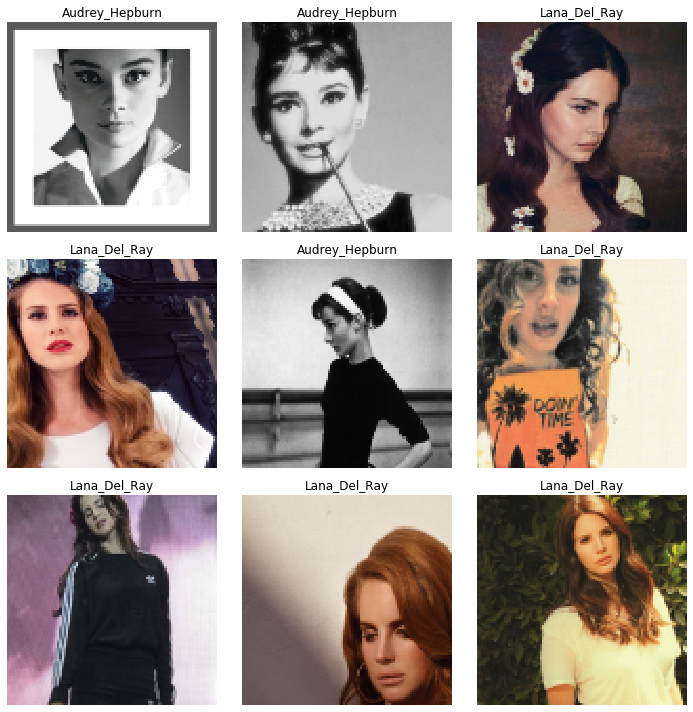

In [6]:
data.show_batch(rows=3, figsize=(10,10))


In [8]:
learner = cnn_learner(data, models.resnet34 , metrics=accuracy)
learner.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 171MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.794253,2.856936,0.350000,00:13
1,1.750690,2.239055,0.600000,00:05
2,1.341023,2.745389,0.600000,00:04
3,1.085863,2.370060,0.650000,00:04


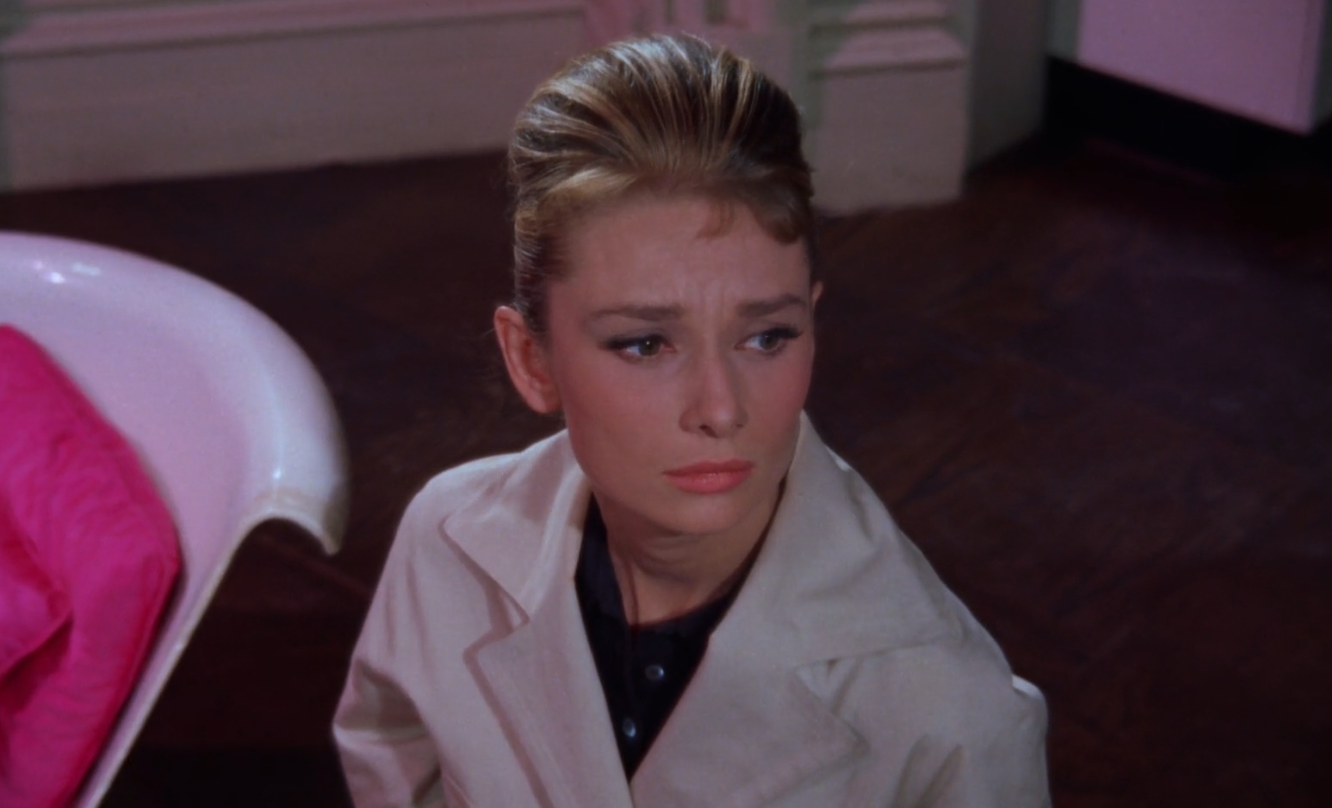

In [15]:
filename = '/content/drive/My Drive/fastai/Lana_vs_Audrey/kk/audrey.PNG'
img = open_image(filename)
img

In [17]:
pred = learner.predict(img)
print(pred)


(Category Audrey_Hepburn, tensor(0), tensor([0.7797, 0.2203]))


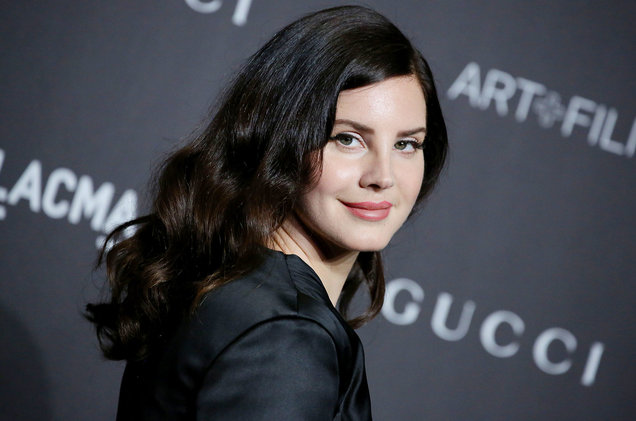

In [20]:
filename = '/content/drive/My Drive/fastai/Lana_vs_Audrey/kk/5.jpg'
img2 = open_image(filename)
img2

In [25]:
pred = learner.predict(img2)
print(pred)

(Category Lana_Del_Ray, tensor(1), tensor([1.1947e-09, 1.0000e+00]))


In [0]:
learner.save('stage-1')

In [0]:
learner.unfreeze()

In [10]:
learner.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


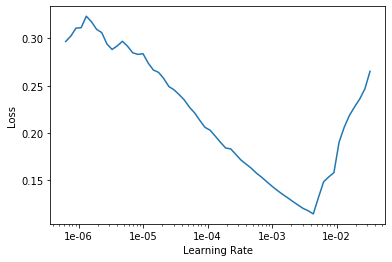

In [12]:
learner.recorder.plot()

In [24]:
learner.fit_one_cycle(1, max_lr=slice(1e-4,4e-2))


epoch,train_loss,valid_loss,accuracy,time
0,0.337383,0.979740,0.850000,00:03
1,0.230967,0.167128,0.950000,00:04


In [0]:
learner.save('stage-2')

Export model

In [0]:
learner.export(file = Path('/content/drive/My Drive/fastai/Lana_vs_Audrey/95/AudreyLana.pkl'))

Import saved Model

In [0]:
imported_learner = load_learner ( '/content/drive/My Drive/fastai/Lana_vs_Audrey/95', 'AudreyLana.pkl' )

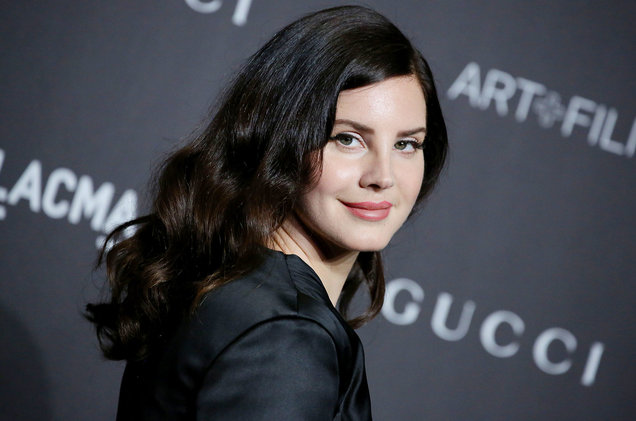

In [33]:
imported_learner_pred = imported_learner.predict( img2 )
img2

In [34]:
print (pred)

(Category Lana_Del_Ray, tensor(1), tensor([1.1947e-09, 1.0000e+00]))
